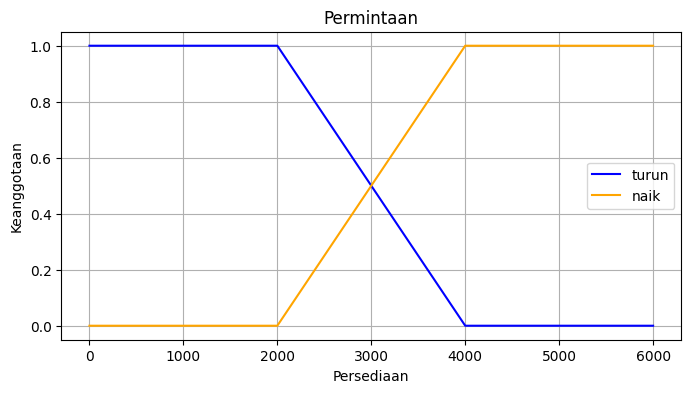

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define Fuzzy Logic classes
class Fuzzy:
    def __init__(self, min_value, max_value):
        self.min = min_value
        self.max = max_value

    def down(self, x):
        return max(0, (self.max - x) / (self.max - self.min))

    def up(self, x):
        return max(0, (x - self.min) / (self.max - self.min))

    def middle(self, x):
        mid = (self.min + self.max) / 2
        if self.min <= x <= mid:
            return (x - self.min) / (mid - self.min)
        elif mid < x <= self.max:
            return (self.max - x) / (self.max - mid)
        return 0


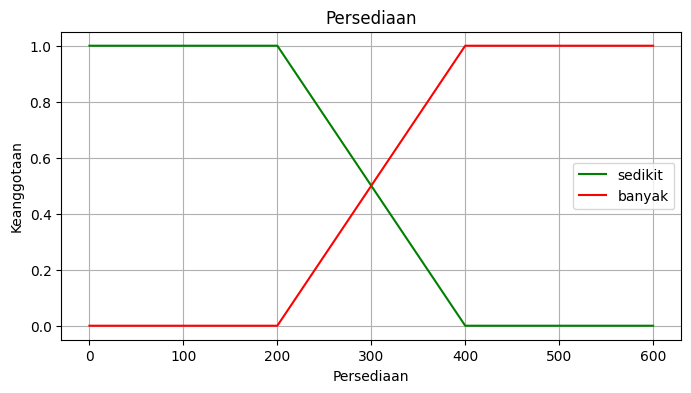

In [2]:
class Demand(Fuzzy):
    def decrease(self, x):
        return self.down(x)

    def stay(self, x):
        return self.middle(x)

    def increase(self, x):
        return self.up(x)


class Stock(Fuzzy):
    def a_few(self, x):
        return self.down(x)

    def medium(self, x):
        return self.middle(x)

    def a_lot(self, x):
        return self.up(x)


class Production(Fuzzy):
    def reduce(self, fuzzy_value):
        return self.min + fuzzy_value * (self.max - self.min)

    def add(self, fuzzy_value):
        return self.min + fuzzy_value * (self.max - self.min)


Matplotlib is building the font cache; this may take a moment.


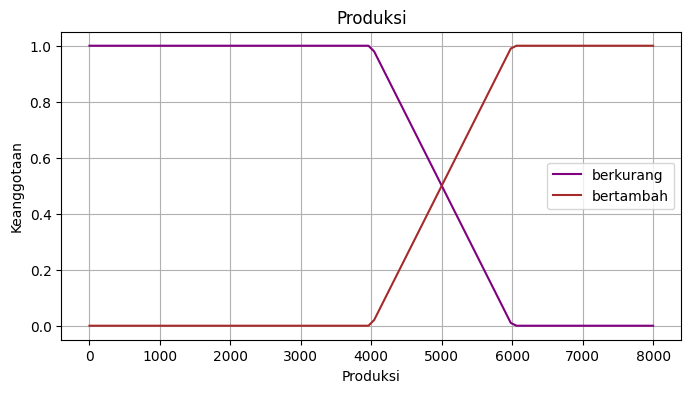

In [1]:
# Instantiate fuzzy sets
demand = Demand(1000, 6000)
stock = Stock(100, 700)
production = Production(2000, 7000)

# Define fuzzy rules
def fuzzy_rules(demand_value, stock_value):
    # Fuzzy membership values for demand
    demand_decrease = demand.decrease(demand_value)
    demand_stay = demand.stay(demand_value)
    demand_increase = demand.increase(demand_value)

    # Fuzzy membership values for stock
    stock_a_few = stock.a_few(stock_value)
    stock_medium = stock.medium(stock_value)
    stock_a_lot = stock.a_lot(stock_value)

    # Apply rules
    rules = []

    rules.append((min(demand_decrease, stock_a_few), "add"))
    rules.append((min(demand_decrease, stock_medium), "add"))
    rules.append((min(demand_decrease, stock_a_lot), "reduce"))

    rules.append((min(demand_stay, stock_a_few), "add"))
    rules.append((min(demand_stay, stock_medium), "reduce"))
    rules.append((min(demand_stay, stock_a_lot), "reduce"))

    rules.append((min(demand_increase, stock_a_few), "add"))
    rules.append((min(demand_increase, stock_medium), "reduce"))
    rules.append((min(demand_increase, stock_a_lot), "reduce"))

    return rules


In [ ]:
# Defuzzification using Tsukamoto method
def defuzzification(rules):
    numerator = 0
    denominator = 0

    for rule in rules:
        fuzzy_value, action = rule

        if action == "add":
            crisp_value = production.add(fuzzy_value)
        elif action == "reduce":
            crisp_value = production.reduce(fuzzy_value)

        numerator += fuzzy_value * crisp_value
        denominator += fuzzy_value

    return numerator / denominator if denominator != 0 else 0


In [ ]:
# Input values
demand_value = 3000  # Example input for demand
stock_value = 400    # Example input for stock

# Validate input
if not (1000 <= demand_value <= 6000):
    raise ValueError("Input permintaan berada di luar rentang (1000–6000)")
if not (100 <= stock_value <= 700):
    raise ValueError("Input persediaan berada di luar rentang (100–700)")

# Fuzzy inference
rules = fuzzy_rules(demand_value, stock_value)
final_production = defuzzification(rules)

# Output results
print(f"Fuzzy rules: {rules}")
print(f"Final production value: {final_production}")


In [ ]:
# Visualization
x_demand = np.linspace(1000, 6000, 500)
x_stock = np.linspace(100, 700, 500)
x_production = np.linspace(2000, 7000, 500)

# Plot Demand
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(x_demand, [demand.decrease(x) for x in x_demand], label="Turun")
plt.plot(x_demand, [demand.stay(x) for x in x_demand], label="Tetap")
plt.plot(x_demand, [demand.increase(x) for x in x_demand], label="Naik")
plt.axvline(demand_value, color='black', linestyle='--', label=f"Input Demand = {demand_value}")
plt.title("Permintaan (Demand)")
plt.legend()
plt.grid()

# Plot Stock
plt.subplot(3, 1, 2)
plt.plot(x_stock, [stock.a_few(x) for x in x_stock], label="Sedikit")
plt.plot(x_stock, [stock.medium(x) for x in x_stock], label="Sedang")
plt.plot(x_stock, [stock.a_lot(x) for x in x_stock], label="Banyak")
plt.axvline(stock_value, color='black', linestyle='--', label=f"Input Stock = {stock_value}")
plt.title("Persediaan (Stock)")
plt.legend()
plt.grid()

# Plot Production
plt.subplot(3, 1, 3)
plt.plot(x_production, [production.reduce(f) for f in np.linspace(0, 1, 500)], label="Berkurang")
plt.plot(x_production, [production.add(f) for f in np.linspace(0, 1, 500)], label="Bertambah")
plt.axvline(final_production, color='red', linestyle='--', label=f"Output Production = {final_production}")
plt.title("Produksi (Production)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
